# HR Analytics: Employee Promotion


## Junior TechTitan Team
## Data Analysis
**Dataset:** HR Analytics: Employee Promotion Data | **Source:** [Kaggle](https://www.kaggle.com/arashnic/hr-ana)

PT Titan Tech adalah sebuah perusahaan multi nasional yang memiliki cabang di beberapa nergara, sehingga perusahaan juga memiliki karyawan yang tergolong banyak. Proses evaluasi untuk menentukan karyawan yang layak untuk mendapat promosi tentu membutuhkan pengamatan yang tepat terhadap aspek-aspek yang menjadi kunci penilaian untuk memperoleh keputusan yang akurat. Dan tentunya jika hal ini dilakukan secara manual oleh tim HR akan cukup memakan waktu. Belum lagi penentuan karyawan layak promosi yang tidak tepat akan merugikan perusahaan di sisi operasional cost, dan menimbulkan kesenjangan yang tidak adil di antara karyawan

Sebagai tim Data Scientist, kita ditugaskan untuk membantu menganalisa dan membangun sebuah model yang mampu mendefinisikan dan mengklasifikasikan karyawan mana yang sekiranya tepat untuk dapat di promosikan berdasarkan pemilihan fitur yang tepat. Sehingga proses evaluasi untuk program promosi karyawan menjadi lebih cepat dan efisien tanpa mengurangi keakuratannya.

**Problems:**
1. Perusahaan membutuhkan bantuan agar proses evaluasi untuk menentukan karyawan mana yang layak promosi menjadi lebih cepat
2. Bagaimana menciptakan sistem klasifikasi yang akurat terhadap karyawan untuk menentukan mana karyawan layak promosi dan tidak

**Goals:**
1. Membuat model Machine Learning untuk membantu pemilihan karyawan yang layak promosi secara efisien
2. Membuat model klasifikasi yang akurat untuk mencegah kerugian perusahaan dari sisi operational cost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
smote = SMOTE()

# Data Understanding

In [ ]:
df_train = pd.read_csv('train.csv')
df_train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,45,0


Dari data yang di dapat, kita memiliki 13 kolom dan 54808 bari dara historis dari tim HR PT Titan Tech

* employee_id          : ID unik karyawan
* department           : Departemen atau divisi karyawan
* region               : Wilayah kerja karyawan
* education            : Pendidikan terakhir karyawan
* gender               : Jenis kelamin karyawan
* recruitment_channel  : Saluran rekrutmen karyawan 
* no_of_trainings      : Jumlah pelatihan yang diselesaikan pada tahun sebelumnya seperti pelatihan soft skill, keterampilan teknis, dll.
* age                  : Umur karyawan
* previous_year_rating : Rating karyawan pada tahun sebelumnya  
* length_of_service    : Lama karyawan bekerja (dalam tahun)
* awards_won?          : Jika memenangkan penghargaan tahun lalu maka 1, jika tidak maka 0
* avg_training_score   : Skor rata-rata dalam evaluasi pelatihan
* is_promoted          : Jika direkomendasikan promosi maka 1, jika tidak maka 0



In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [ ]:
df_describe =[]

for i in df_train.columns: #mengiterasi i di setiap kolom pada dataset
    df_describe.append([ #menambahkan hasil i, tipe data, jumlah NaN, persentase nan yang dibulatkan , jumlah unique, unique nya ke dalam list
        i,
        df_train[i].dtypes,#tipe
        df_train[i].isna().sum(),#jumlah NaN
        round((((df_train[i].isna().sum())/(len(df_train)))*100),2),#Persentase jumlah NaN
        df_train[i].nunique(),#Jumlah Unique
        df_train[i].unique() #Unique
    ])
    
desc = pd.DataFrame(df_describe, columns=['column','type','nan','nan%','nunique','unique']) # membuat dataframe dengan data train_describe dengan kolom-kolom tersebut
desc

,column,type,nan,nan%,nunique,unique
0,employee_id,int64,0,0.00,54808,"[65438, 65141, 7513, 2542, 48945, 58896, 20379..."
1,department,object,0,0.00,9,"[Sales & Marketing, Operations, Technology, An..."
2,region,object,0,0.00,34,"[region_7, region_22, region_19, region_23, re..."
3,education,object,2409,4.40,3,"[Master's & above, Bachelor's, nan, Below Seco..."
4,gender,object,0,0.00,2,"[f, m]"
5,recruitment_channel,object,0,0.00,3,"[sourcing, other, referred]"
6,no_of_trainings,int64,0,0.00,10,"[1, 2, 3, 4, 7, 5, 6, 8, 10, 9]"
7,age,int64,0,0.00,41,"[35, 30, 34, 39, 45, 31, 33, 28, 32, 49, 37, 3..."
8,previous_year_rating,float64,4124,7.52,5,"[5.0, 3.0, 1.0, 4.0, nan, 2.0]"
9,length_of_service,int64,0,0.00,35,"[8, 4, 7, 10, 2, 5, 6, 1, 3, 16, 9, 11, 26, 12..."


Dari pengamatan tersebut kita dapat memperoleh informasi:
*   Dataframe masih memiliki data *null values* di kolom **education** dan **previous_year_rating**
*   Target klasifikasi adalah kolom **is_promoted** dengan tipe data int64 yang memiliki data 0 dan 1, di mana 1 melambangkan karyawan mendapat promosi
*   Kolom lainnnya adalah *feature*


# EDA

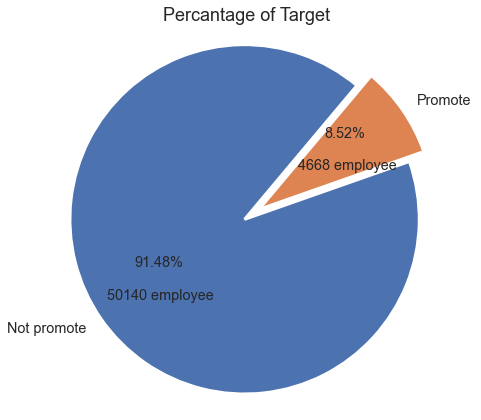

In [ ]:
sns.set(style="whitegrid")
values = list(df_train['is_promoted'].value_counts().values)
labels = ['Not promote','Promote']

fig, ax = plt.subplots(figsize=(7,6))
ax.pie(values, labels=labels,  autopct=lambda p:f'{p:.2f}%\n\n {p*sum(values)/100 :.0f} employee',
       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'large'},
       startangle=50,
       explode= [0, 0.1])
ax.set_title('Percantage of Target', size=18)
ax.axis('equal')
plt.tight_layout()
plt.show()

Kita memiliki dataset yang imbalanced dimana dari 54808 baris hanya ada 8.52% karyawan yang di lakukan promosi

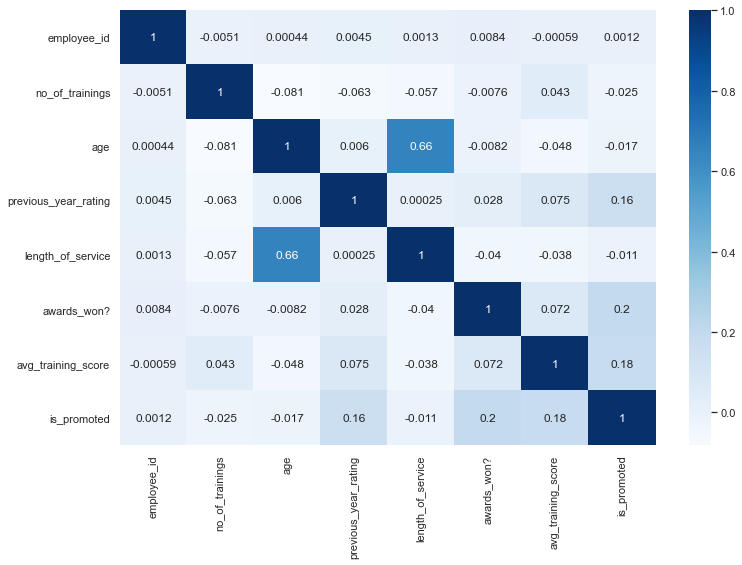

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df_train.corr(), annot=True, cmap='Blues')
plt.show()

## Numerical Features

In [ ]:
data_int = ['no_of_trainings','age','previous_year_rating','length_of_service','awards_won?','avg_training_score']
data_cat = ['department','region','education','gender','recruitment_channel']

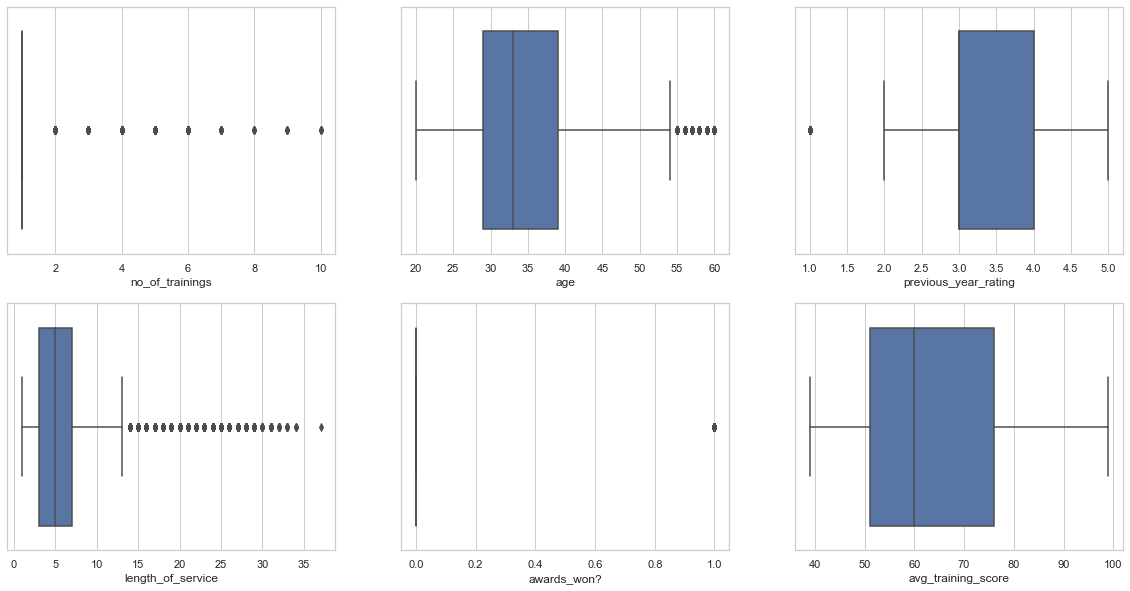

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,10))
ax=ax.flatten()
for x, i in enumerate(data_int):
    sns.boxplot(data=df_train, x=i, ax=ax[x])

### No of Trainings

In [ ]:
df_train['train_cat'] = np.where(df_train['no_of_trainings'] >= 5, '>=5', df_train['no_of_trainings'])

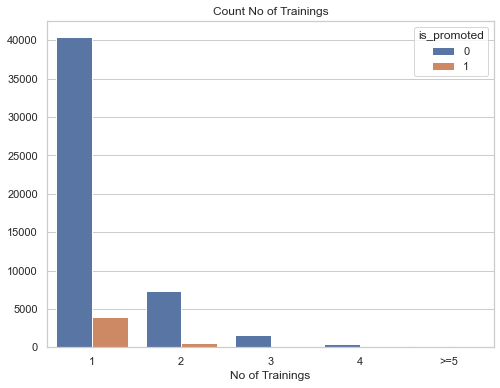

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df_train, x='train_cat', hue='is_promoted')
plt.title('Count No of Trainings')
plt.xlabel('No of Trainings')
plt.ylabel('')
plt.show()

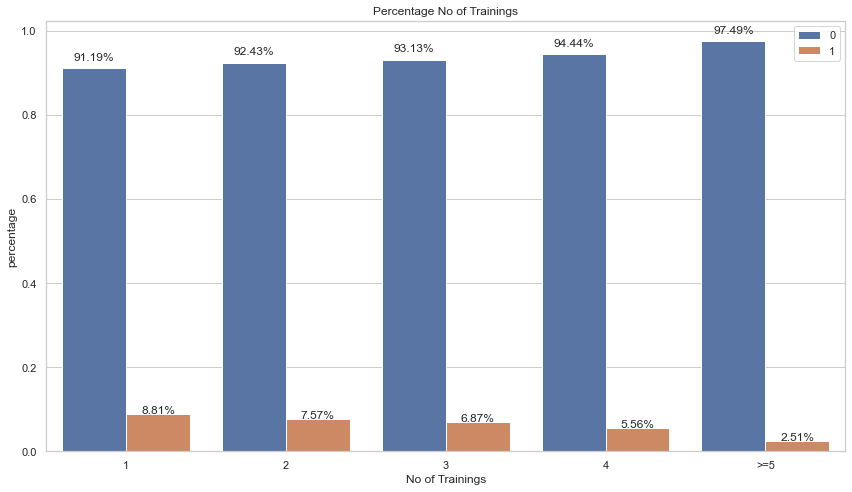

In [ ]:
training_tmp = df_train.groupby('train_cat')['is_promoted'].value_counts(normalize = True).rename("percentage").reset_index()

ax = plt.figure(figsize=(12,7))
ax = sns.barplot(data=training_tmp, x='train_cat', y='percentage', hue='is_promoted')
ax.legend(loc='best')
plt.title('Percentage No of Trainings')
plt.xlabel('No of Trainings')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{round(height*100,2)}'+"%", (x + width/2, y + height*1.02), ha='center')
    
plt.tight_layout()
plt.show()

- Jumlah training terhadap karyawan banyaknya hanya dilakukan 1 kali pada setiap karyawan, namun ada juga beberapa karyawan yang mendapat training lebih dari 1 kali, bahkan ada yang sampai mendapat lebih dari 5 kali training.

- Namun dari barplot diatas dapat kita lihat bahwa, jumlah pelatihan yang banyak yang di dapat oleh seorang karyawan tidak memperbesar kesempatan karyawan tersebut mendapatkan promosi

- Karyawan yang hanya mendapat 1 kali training mendapat kesempatan promosi lebih besar. Justru semakin banyak training peluang karyawan untuk di promosikan malah menurun

### Age

In [ ]:
df_train[['age']].describe()

,age
count,54808.000000
mean,34.803915
std,7.660169
min,20.000000
25%,29.000000
50%,33.000000
75%,39.000000
max,60.000000


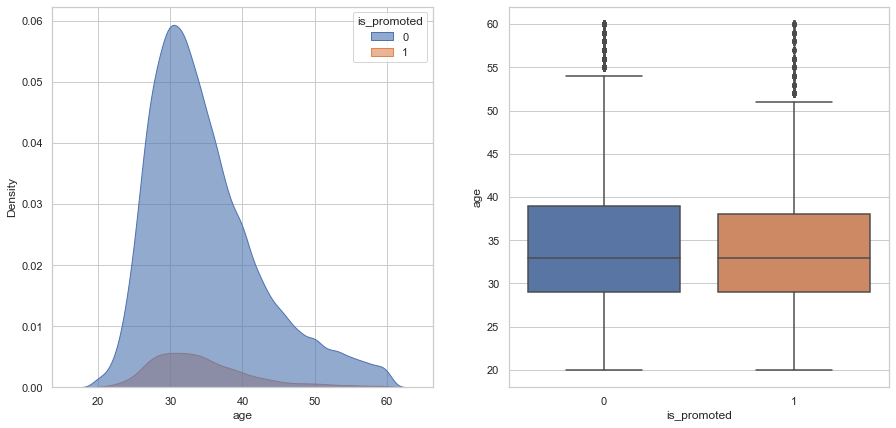

In [ ]:
fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(15,7))
sns.kdeplot(df_train['age'] , fill=True, alpha=0.6, hue = df_train['is_promoted'], ax=ax[0])
sns.boxplot(data=df_train, x='is_promoted', y='age', ax=ax[1])
plt.show()

In [ ]:
def age_cat(row):
    if row['age'] >= 20 and row['age'] <= 25:
        return '20-25'
    elif row['age']  >= 26 and row['age'] <= 30:
        return '26-30'
    elif row['age'] >= 31 and row['age'] <= 35:
        return '31-35'
    elif row['age'] >= 36 and row['age'] <= 40:
        return '36-40'
    elif row['age'] >= 41 and row['age'] <= 45:
        return '41-45'
    elif row['age'] >= 46 and row['age'] <= 50:
        return '46-50'
    elif row['age'] >= 51 and row['age'] <= 55:
        return '51-55'
    elif row['age'] >= 56 and row['age'] <= 60:
        return '56-60'
    
df_train['age_cat'] = df_train.apply(lambda x: age_cat(x), axis=1)

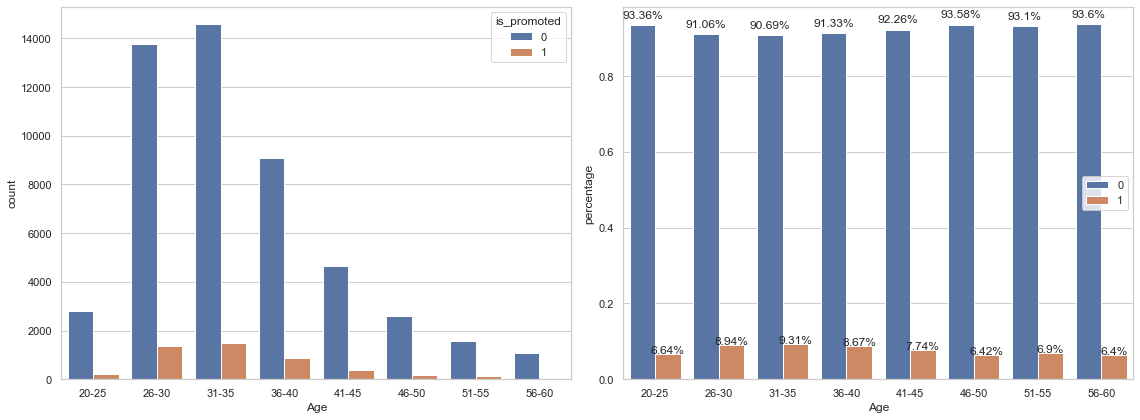

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))

sns.countplot(data=df_train.sort_values(by='age_cat'), x='age_cat', hue='is_promoted', ax=ax1)

age_tmp = df_train.groupby('age_cat')['is_promoted'].value_counts(normalize = True).rename("percentage").reset_index()
fig = sns.barplot(data=age_tmp, x='age_cat', y='percentage', hue='is_promoted', ax=ax2)
fig.legend(loc=5)

for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    fig.annotate(f'{round(height*100,2)}'+"%", (x + width/2, y + height*1.02), ha='center')

ax1.set_xlabel('Age')
ax2.set_xlabel('Age')

plt.tight_layout()
plt.show()

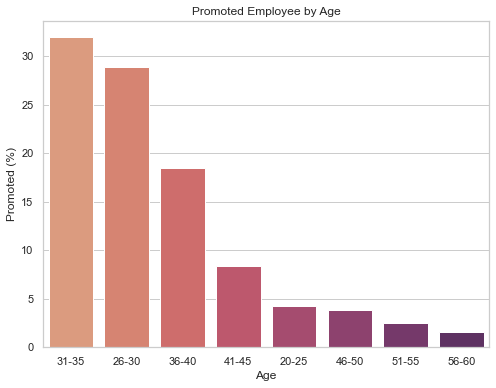

In [ ]:
cat_age = df_train['age_cat'].unique()
values = []
for i in df_train['age_cat'].unique():
    x = round(len(df_train[(df_train['age_cat'] == i) & df_train['is_promoted'] ==1])/4668*100,2) #4668 = jumlah karyawan yg di promote
    values.append(x)

age_promoted = pd.DataFrame(data=cat_age, columns=['Age'])
age_promoted['Promoted'] = values
age_promoted

plt.figure(figsize=(8,6))
sns.barplot(data=age_promoted.sort_values('Promoted', ascending=False), x='Age', y='Promoted', palette="flare")
plt.ylabel('Promoted (%)')
plt.title('Promoted Employee by Age')
plt.show()

- Rata-rata umur karyawan di perusahaan ini berada di kisaran umur 31-35 tahun
- Berdasarkan data historis yang kita miliki, karyawan dengan umur 31-35 tahun memiliki kesempatan lebih untuk mendapatkan promosi yaitu sekitar 32.03% dari total 4668 karyawan yang mendapatkan promosi jabatan, lalu diikuti dengan rentang umur 26-30 dengan 28.92%

### Previous Year Rating

In [ ]:
df_train['previous_year_rating'].describe()

count    50684.000000
mean         3.329256
std          1.259993
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: previous_year_rating, dtype: float64

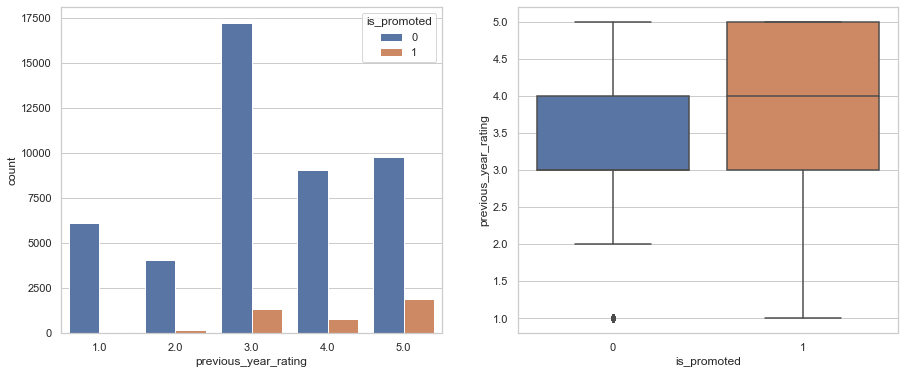

In [ ]:
fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(15,6))
sns.countplot(data=df_train, x='previous_year_rating', ax=ax[0], hue='is_promoted')
sns.boxplot(data=df_train, x='is_promoted', y='previous_year_rating')
plt.show()

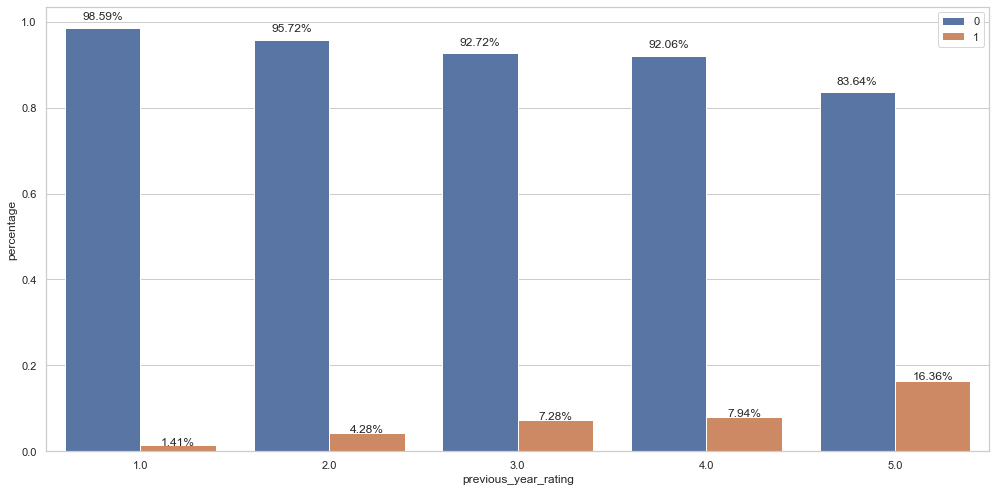

In [ ]:
rating_tmp = df_train.groupby('previous_year_rating')['is_promoted'].value_counts(normalize = True).rename("percentage").reset_index()

ax = plt.figure(figsize=(14,7))
ax = sns.barplot(data=rating_tmp, x='previous_year_rating', y='percentage', hue='is_promoted')
ax.legend(loc='best')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{round(height*100,2)}'+"%", (x + width/2, y + height*1.02), ha='center')

plt.tight_layout()
plt.show()

- Dari indeks penilaian 1-5, rata-rata karyawan memiliki rating di angka 3, seperti yang kita ketahui rating 3 bisa dikatakan adalah standar, tidak buruk dan juga tidak terlalu bagus. Namun karyawan yang memiliki rating di angka 4 dan 5 atau rating baik juga ada lumayan banyak
- Karyawan dengan rating baik di tahun sebelumnya (rating 4-5) memiliki kesempatan lebih untuk mendapatkan promosi di posisinya

### Length of Service

In [ ]:
df_train[['length_of_service']].describe()

,length_of_service
count,54808.000000
mean,5.865512
std,4.265094
min,1.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,37.000000


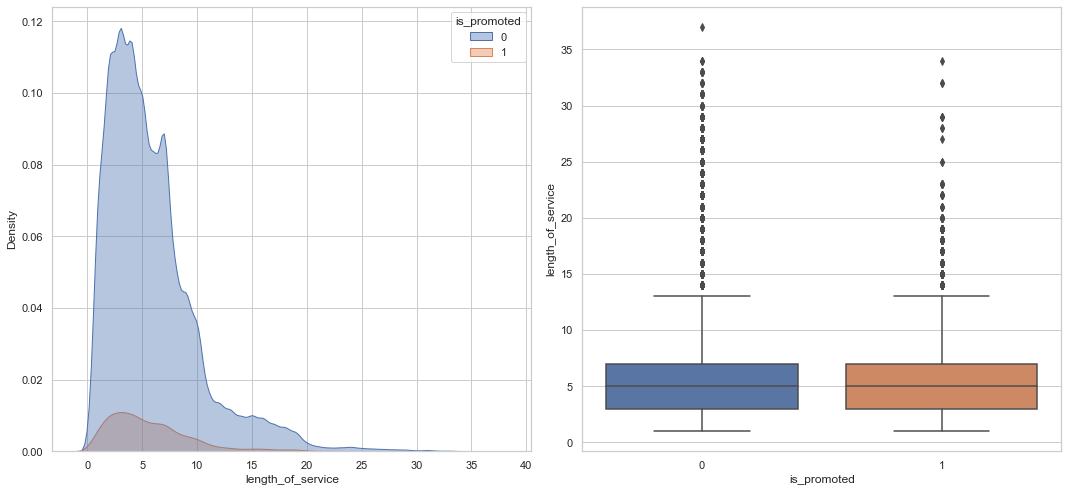

In [ ]:
fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(15,7))
sns.kdeplot(df_train['length_of_service'] , fill=True, alpha=0.4, hue = df_train['is_promoted'], ax=ax[0])
sns.boxplot(data=df_train, x='is_promoted', y='length_of_service')

plt.tight_layout()
plt.show()

In [ ]:
def los(row):
    if row['length_of_service'] >= 1 and row['length_of_service'] <= 5:
        return '1-5'
    elif row['length_of_service']  >= 6 and row['length_of_service'] <= 10:
        return '6-10'
    elif row['length_of_service'] >= 11 and row['length_of_service'] <= 20:
        return '11-20'
    elif row['length_of_service'] >= 21:
        return '>=21'
    
df_train['los_cat'] = df_train.apply(lambda x: los(x), axis=1)

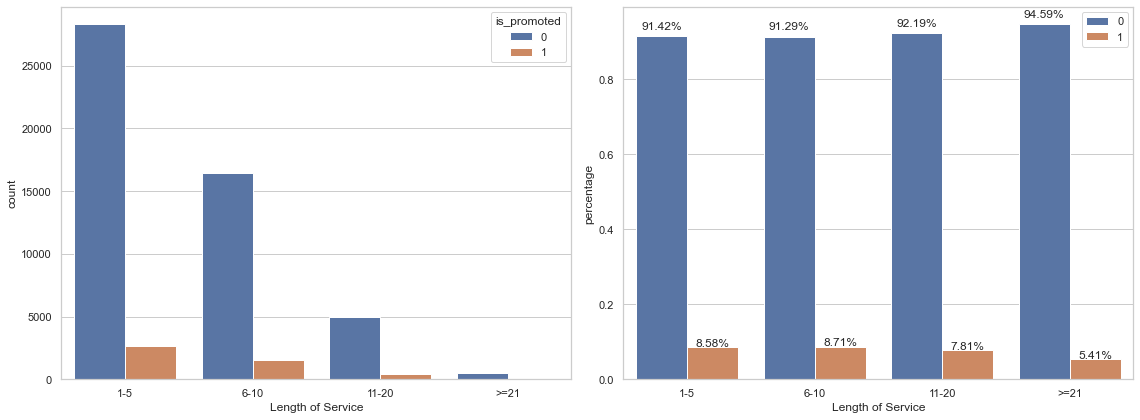

In [ ]:
df_train['sort'] = df_train['los_cat'].str.extract('(\d+)', expand=False).astype(int)

los_tmp = df_train.groupby('los_cat')['is_promoted'].value_counts(normalize = True).rename("percentage").reset_index()
los_tmp['sort'] = los_tmp['los_cat'].str.extract('(\d+)', expand=False).astype(int)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))

sns.countplot(data=df_train.sort_values('sort'), x='los_cat', hue='is_promoted', ax=ax1)
df_train = df_train.drop('sort', axis=1)

fig = sns.barplot(data=los_tmp.sort_values('sort'), x='los_cat', y='percentage', hue='is_promoted', ax=ax2)
fig.legend(loc='best')

for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    fig.annotate(f'{round(height*100,2)}'+"%", (x + width/2, y + height*1.02), ha='center')

ax1.set_xlabel('Length of Service')
ax2.set_xlabel('Length of Service')

plt.tight_layout()
plt.show()

- Perusahaan memiliki karyawan yang lama kerjanya banyak di rentang 1-5 tahun dan 6-10 tahun
- Dari hasil analisa diatas di dapatkan bahwa lama bekerja seorang karyawan tidak terlalu mempengaruhi karyawan tersebut mendapatkan promosi, hal ini bisa di asumsikan bahwa lama kerja seorang karyawan tidak menjamin bahwa karyawan tersebut akan mendapatkan promosi atau karyawan yang lama kerjanya tinggi memiliki posisi diatas manager

### Awards Won

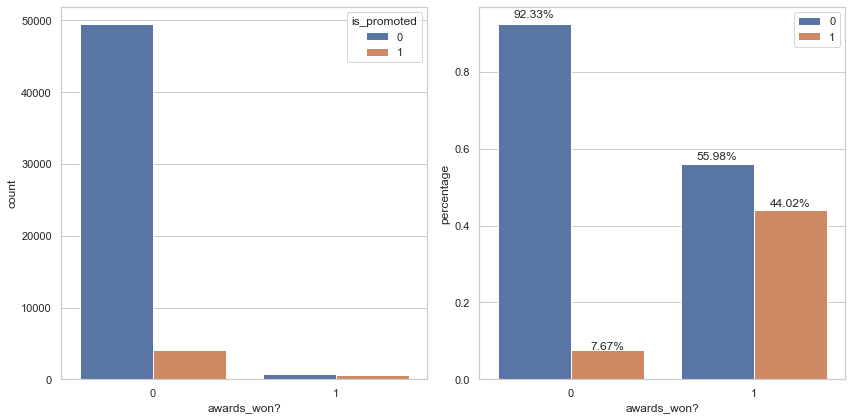

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

sns.countplot(data=df_train, x='awards_won?', hue='is_promoted', ax=ax1)

awn_tmp = df_train.groupby('awards_won?')['is_promoted'].value_counts(normalize = True).rename("percentage").reset_index()
fig = sns.barplot(data=awn_tmp, x='awards_won?', y='percentage', hue='is_promoted', ax=ax2)
fig.legend(loc='best')

for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    fig.annotate(f'{round(height*100,2)}'+"%", (x + width/2, y + height*1.02), ha='center')
    
plt.tight_layout()
plt.show()

Karyawan yang pernah mendapatkan penghargaan di tahun-tahun sebelumnya memiliki peluang untuk di promosikan cukup besar

### Avg Training Score

In [ ]:
df_train['avg_training_score'].describe()

count    54808.000000
mean        63.386750
std         13.371559
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64

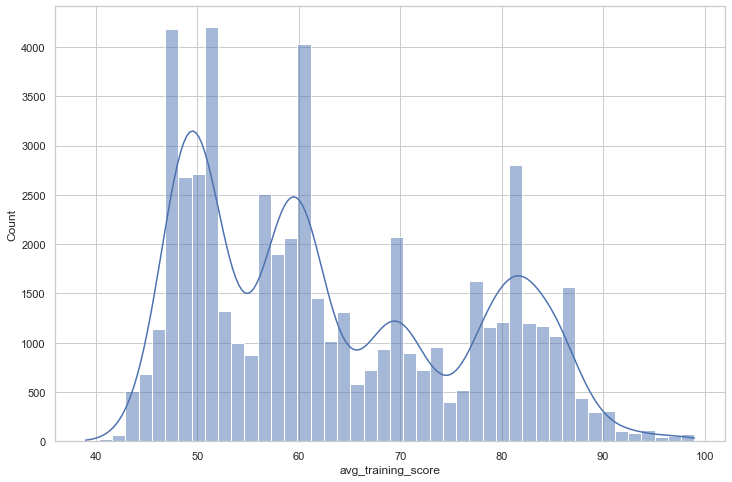

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data=df_train, x='avg_training_score', kde=True)
plt.show()

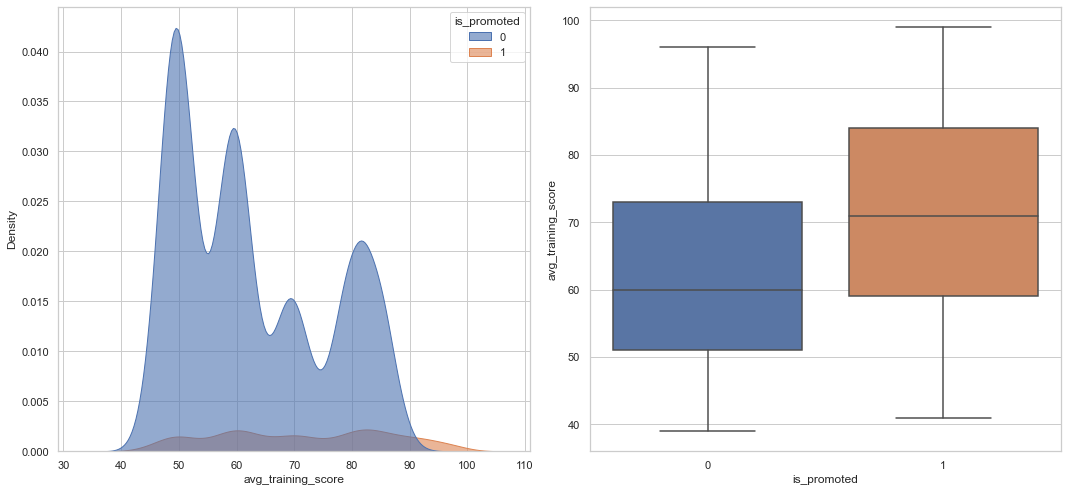

In [ ]:
fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(15,7))
sns.kdeplot(df_train['avg_training_score'] , fill=True, alpha=0.6, hue = df_train['is_promoted'], ax=ax[0])
sns.boxplot(data=df_train, x='is_promoted', y='avg_training_score')
plt.tight_layout()
plt.show()

In [ ]:
def score_cat(row):
    if row['avg_training_score'] >= 90 and row['avg_training_score'] <= 100:
        return '90-100'
    elif row['avg_training_score']  >= 80 and row['avg_training_score'] <= 89:
        return '80-89'
    elif row['avg_training_score'] >= 70 and row['avg_training_score'] <= 79:
        return '70-79'
    elif row['avg_training_score'] >= 60 and row['avg_training_score'] <= 69:
        return '60-69'
    elif row['avg_training_score'] < 60:
        return '<60'
    
df_train['score_cat'] = df_train.apply(lambda x: score_cat(x), axis=1)

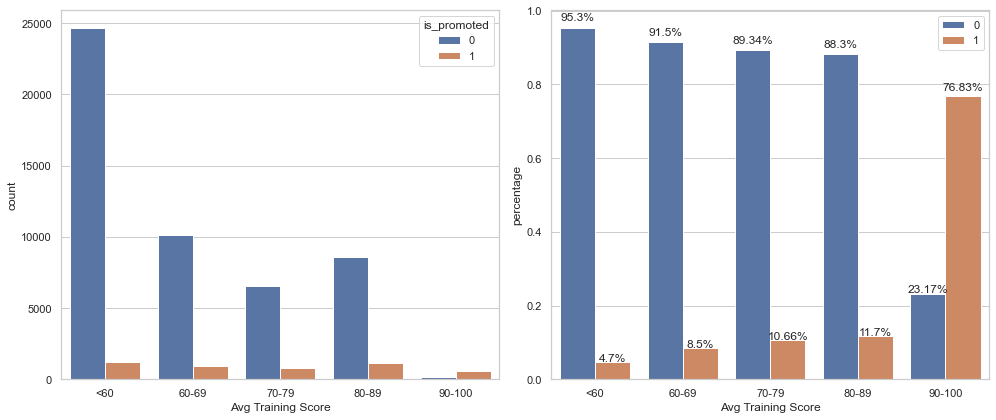

In [ ]:
score_tmp = df_train.groupby('score_cat')['is_promoted'].value_counts(normalize = True).rename("percentage").reset_index()
score_tmp['sort'] = score_tmp['score_cat'].str.extract('(\d+)', expand=False).astype(int)
score_tmp['sort'] = np.where(score_tmp['score_cat'] == '<60', 50,score_tmp['sort'])

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))

sns.countplot(data=df_train, x='score_cat', hue='is_promoted', ax=ax1)

fig = sns.barplot(data=score_tmp.sort_values('sort'), x='score_cat', y='percentage', hue='is_promoted', ax=ax2)
fig.legend(loc=1)

for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    fig.annotate(f'{round(height*100,2)}'+"%", (x + width/2, y + height*1.02), ha='center')
    
ax1.set_xlabel('Avg Training Score')
ax2.set_xlabel('Avg Training Score')

plt.tight_layout()
plt.show()

- Karyawan dengan average training socre yang tinggi memiliki kesempatan lebih untuk di promosikan
- Jika kita meilihat angkanya, karyawan dengan average training score di angka 90-100 memiliki kesempatan untuk di promosikan cukup tinggi
- Untuk karyawan dengan average training score >95 hampir pasti mendapatkan promosi

# Categorical Feature

In [ ]:
data_cat = ['department','region','education','gender','recruitment_channel']

## Department

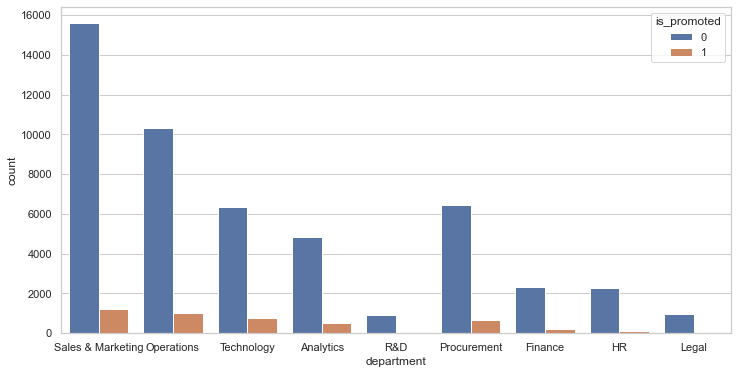

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_train, x='department', hue='is_promoted')
plt.show()

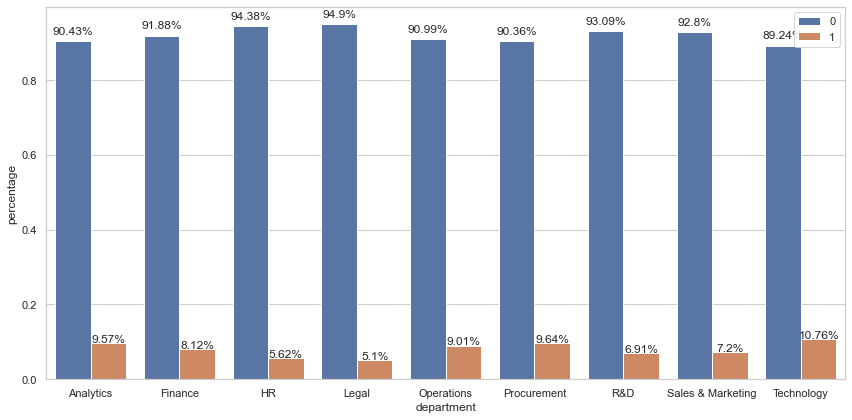

In [ ]:
fig = plt.figure(figsize=(12,6))

dept_tmp = df_train.groupby('department')['is_promoted'].value_counts(normalize = True).rename("percentage").reset_index()
fig = sns.barplot(data=dept_tmp, x='department', y='percentage', hue='is_promoted')
fig.legend(loc=1)

for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    fig.annotate(f'{round(height*100,2)}'+"%", (x + width/2, y + height*1.02), ha='center')
    
plt.tight_layout()
plt.show()

- Jika dilihat dari barplot diatas, karyawan di department Tecnology, Operations, Analytics, Procurement dan Finance memiliki nilai rata-rata untuk di promosikan lebih tinggi
- Walaupun begitu, feature department kurang relevan jika digunakan untuk menentukan karyawan layak promosi atau tidak, beberapa department diatas yang memiliki nilai rata-rata promosi tinggi di banding department lain, kemungkinannya adalah department tersebut memiliki divisi yang lebih banyak di bandingkan dengan department lainnya. Seperti yang kita ketahui setiap divisi tentu memiliki kepala divisinya masing-masing. Oleh sebab itu akan sangat mungkin jika department yang memiliki divisi cukup banyak akan melakukan promosi karyawan lebih banyak.

## Region

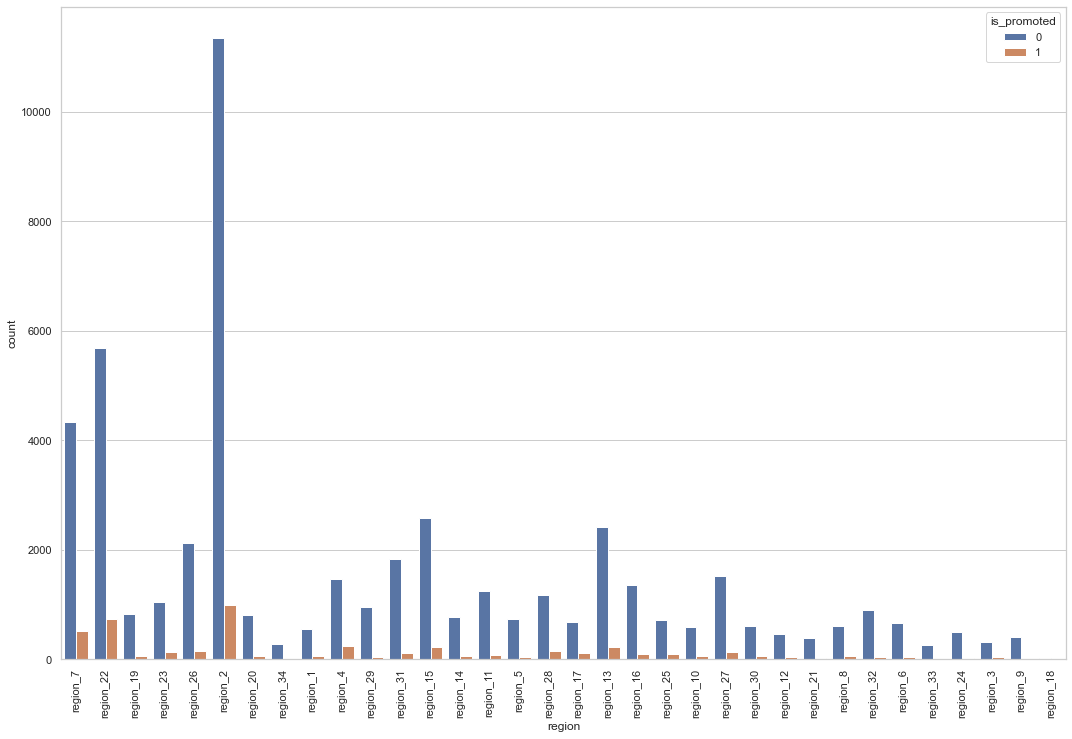

In [ ]:
plt.figure(figsize=(18,12))
sns.countplot(data=df_train, x='region', hue='is_promoted')
plt.xticks(rotation=90)
plt.show()

Tidak terlihat pola yang terlalu jelas dari feature region terhadap peluang seorang karyawan mendapatkan promosi atau tidak.

In [ ]:
# df_region = df_train.groupby('region').count()[['employee_id']].reset_index()
# region = df_region['region'].unique()

# values = []
# for i in region:
#     x = round(len(df_train[(df_train['region'] == i) & df_train['is_promoted'] ==1]) / len(df_train[df_train['region'] == i]), 2)
#     values.append(x)

# df_region['Promoted_%'] = values
# df_region.sort_values(by="Promoted_%", ascending=False)

# Education

In [ ]:
df_train[df_train['is_promoted'] == 1][['education']].value_counts()

education       
Bachelor's          3008
Master's & above    1471
Below Secondary       67
dtype: int64

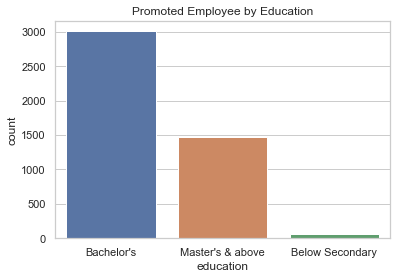

In [ ]:
sns.countplot(data=df_train[df_train['is_promoted'] ==1], x='education')
plt.title('Promoted Employee by Education')
plt.show()

Jika dilihat untuk kondisi saat ini, karyawan yang telah mendapatkan promosi di dominasi oleh karyawan dengan tingkat pendidikan Bachelor's

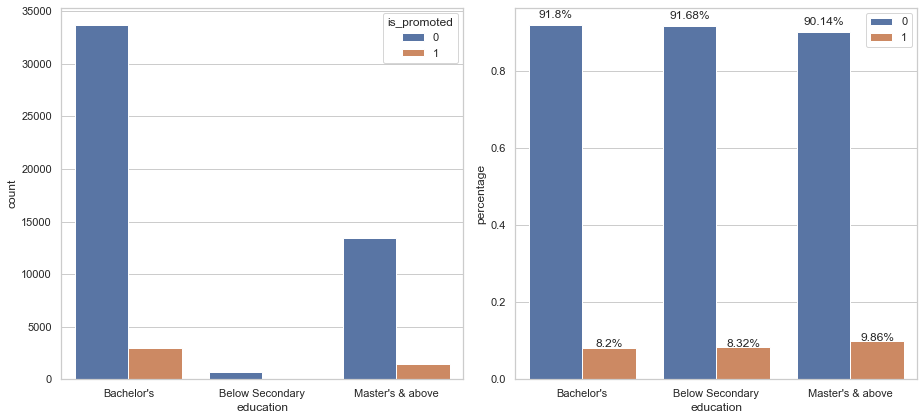

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,6))

sns.countplot(data=df_train.sort_values('education') , x='education', hue='is_promoted', ax=ax1)

edu_tmp = df_train.groupby('education')['is_promoted'].value_counts(normalize = True).rename("percentage").reset_index()
fig = sns.barplot(data=edu_tmp, x='education', y='percentage', hue='is_promoted', ax=ax2)
fig.legend(loc='best')

for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    fig.annotate(f'{round(height*100,2)}'+"%", (x + width/2, y + height*1.02), ha='center')
    
plt.tight_layout()
plt.show()

- Sesuai dengan kondisi perusahaan saat ini, karyawan yang telah mendapatkan promosi di dominasi oleh karyawan dengan tingkat pendidikan Bachelor's, karena karyawan di perusahaan ini paling banyak tingkat pendidikannya di bachelor's
- Namun jika secara persentase kesempatan seorang karyawan mendapatkan promosi bedasarkan educationnya masing-masing tidak ada perbedaan yang cukup jauh dari masing-masing education tersebut

# Gender

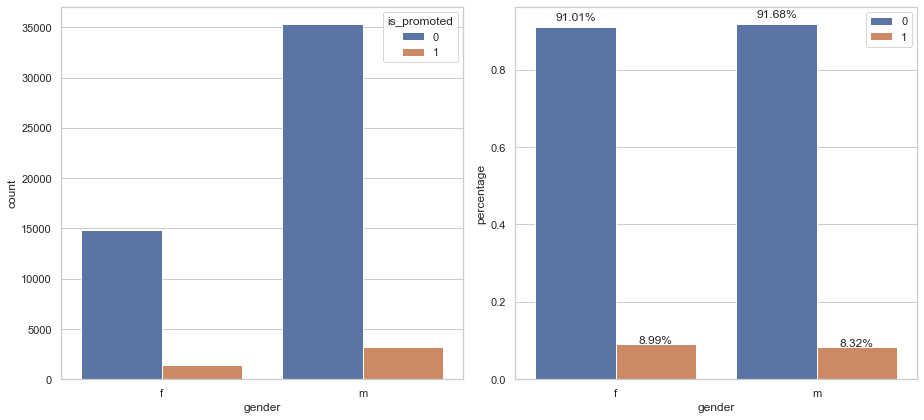

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,6))

sns.countplot(data=df_train, x='gender', hue='is_promoted', ax=ax1)

gender_tmp = df_train.groupby('gender')['is_promoted'].value_counts(normalize = True).rename("percentage").reset_index()
fig = sns.barplot(data=gender_tmp, x='gender', y='percentage', hue='is_promoted', ax=ax2)
fig.legend(loc='best')

for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    fig.annotate(f'{round(height*100,2)}'+"%", (x + width/2, y + height*1.02), ha='center')
    
plt.tight_layout()
plt.show()

- Proporsi gender karyawan di perusahaan ini dominasi oleh karyawan laki-laki
- Namun secara persentase, kesempatan untuk mendapatkan promosi baik itu karyawan laki-laki dan perempuan terlihat sama atau tidak jauh berbeda

## Recruitment Channel

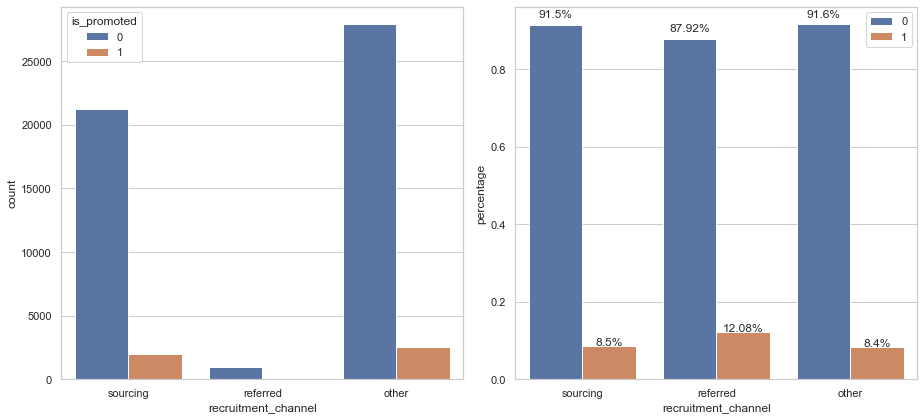

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,6))

sns.countplot(data=df_train.sort_values('recruitment_channel', ascending=False), x='recruitment_channel', hue='is_promoted', ax=ax1)

channel_tmp = df_train.groupby('recruitment_channel')['is_promoted'].value_counts(normalize = True).rename("percentage").reset_index()
fig = sns.barplot(data=channel_tmp.sort_values('recruitment_channel', ascending=False), x='recruitment_channel', y='percentage', hue='is_promoted', ax=ax2)
fig.legend(loc='best')

for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    fig.annotate(f'{round(height*100,2)}'+"%", (x + width/2, y + height*1.02), ha='center')
    
plt.tight_layout()
plt.show()

Karyawan yang di rekrut berdasarkan referred memiliki kesempatan 4% di promosikan lebih besar di bandingkan dengan yang lain

# Summary

-	Dari 54808 data karyawan,hanya  terdapat 4668 karyawan atau 8.52% dari keseluruhan karyawan yang mendapatkan kesempatan promosi


-	Dari hasil analisa yang telah dilakukan, kondisi perusahaan saat ini dalam mengklasifikasikan karyawan mana yang layak di promosikan, yaitu berdasarkan kinerja karyawan di tahun sebelumnya, misalnya seperti apakah karyawan tersebut pernah mendapatkan awards di tahun sebelumnya, rating atau peniliaian kinerja karyawan di tahun sebelumnya dan juga rata-rata nilai yang tinggi dari hasil training yang telah karyawan ikuti.


- No of Trainings atau jumlah training yang pernah di ikuti oleh seorang karyawan banyaknya hanya dilakukan satu kali oleh setiap karyawan. Karyawan yang mendapatkan training lebih dari satu kali atau bahkan hingga training lebih dari lima kali justru kesempatan untuk mendapatkan promosinya semakin menurun jika di bandingkan dengan karyawan yang hanya melakukan satu kali training saja.


- Umur dan lama kerja seorang karyawan tentu saja memiliki korelasi yang positif, namun jika dilihat secara statistik lama kerja seorang karyawan tidak memiliki pengaruh yang signifikan terhadap promosi, begitu juga dengan umur seorang karyawan. Karyawan dengan rentang umur 26 hingga 40 tahun memiliki kesempatan sedikit lebih besar untuk mendapatkan promosi jika di bandingkan dengan umur diatas atau dibawahnya. 


- Seperti yang telah kita ketahui data ini digunakan untuk mengklasifikasikan karyawan yang layak promosi namun hanya untuk posisi manager kebawah. Jadi walaupun lama kerja seorang karyawan tidak memiliki pengaruh positif terhadap promosi, bisadi asumsikan bahwa karyawan yang memiliki lama kerja cukup tinggi atau lebih dari 20 tahun kerja kemungkinan memiliki jabatan atau posisi diatas manager.


- Awards, Previous Year Rating dan Average Training score adalah tiga feature yang paling berpengaruh dalam peluang atau kesempatan karyawan untuk mendapatkan promosi. Seorang karyawan yang memiliki rating di angka 5 berpeluang 16.36% untuk promosi. Seorang karyawan yang pernah mendapatkan awards memiliki peluang 44.02% untuk di promosikan. Karyawan dengan Avg Training Score 90-100 memiliki peluang 76.83% untuk di promosikan, bahkan untuk Avg Training Score >95 dia memiliki peluang 100% atau pasti akan di promosikan.


- Tingkat pendidikan karyawan di perusahaan di dominasi oleh karyawan dengan tingkat pendidikan Bachelor’s. Namun jika dibandngkan dengan masing-masing tingkat pendidikan yang ada, kesempatan untuk mendapatkan promosi di tingkat pendidikannya masing-masing memiliki persentase yang tidak jauh berbeda signifikan, karena mungkin promosi yang dilakukan menyesuaikan dengan divisi dan backround dari pendidikannya masing-masing.


- Walaupun perusahaan memiliki karyawan laki-laki yang lebih banyak dari perempuan, namun baik laki-laki atau perempuan memiliki kesempatan yang sama untuk di promosikan.


- Karyawan dengan proses perekrutan berdasarkan referensi memiliki kesempatan di promosikan sedikit lebih tinggi dibandingkan dengan karyawan yang berasal dari outsorcing atau yang lainnya.
